# Goal

Employee turn-over is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science.

In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [214]:
df = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 1-3/3.Employee_rentation/Employee_Rentation.csv',parse_dates=['join_date', 'quit_date'])

In [215]:
df.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [216]:
df.dtypes

Unnamed: 0              int64
employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   24702 non-null  int64         
 1   employee_id  24702 non-null  float64       
 2   company_id   24702 non-null  int64         
 3   dept         24702 non-null  object        
 4   seniority    24702 non-null  int64         
 5   salary       24702 non-null  float64       
 6   join_date    24702 non-null  datetime64[ns]
 7   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [218]:
df.describe()

,Unnamed: 0,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000
mean,12351.500000,501604.403530,3.426969,14.127803,138183.345478
std,7130.997511,288909.026101,2.700011,8.089520,76058.184573
min,1.000000,36.000000,1.000000,1.000000,17000.000000
25%,6176.250000,250133.750000,1.000000,7.000000,79000.000000
50%,12351.500000,500793.000000,2.000000,14.000000,123000.000000
75%,18526.750000,753137.250000,5.000000,21.000000,187000.000000
max,24702.000000,999969.000000,12.000000,99.000000,408000.000000


In [219]:
df.nunique()

Unnamed: 0     24702
employee_id    24702
company_id        12
dept               6
seniority         31
salary           367
join_date        995
quit_date        664
dtype: int64

# 1. Create a table with 3 columns: day, employee_headcount, company_id.

In [220]:
# Define useful information
unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(df['company_id'].unique())

day = []
company = []
headcount = []

# Loop through date and company id
for date in unique_date:
    for idx in unique_company:
        total_join = len(df[(df['join_date'] <= date) & (df['company_id'] == idx)])
        total_quit = len(df[(df['quit_date'] <= date) & (df['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)

# Create table for day, employee_headcount, company_id
table = pd.DataFrame({'day': day, 'company_id': company, 'employee_headcount': headcount}, 
                     columns=['day', 'company_id', 'employee_headcount'])

In [221]:
table.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


# 2. Employee Churn Analysis
What are the main factors that drive employee churn? 

2.1 Total working days for churn employee 


In [222]:
quit_data=df[~df['quit_date'].isnull()]

work_days = np.array(list(map(lambda x: x.days, quit_data['quit_date'] - quit_data['join_date'])))

# list(map(lambda x: x.days, ...)): This uses the map function to apply the .days attribute to each element in the series of timedeltas. 
# This attribute returns the number of days in each timedelta as an integer. The map function returns a map object, which is then converted to a list.
# np.array(...): This takes the list of days and converts it into a NumPy array, which is a more efficient and convenient data structure for numerical computations.

In [223]:
list(map(lambda x: x.days, quit_data['quit_date'] - quit_data['join_date']))

[585,
 340,
 389,
 1040,
 578,
 1047,
 837,
 340,
 1194,
 340,
 409,
 723,
 340,
 1316,
 360,
 368,
 619,
 347,
 795,
 1152,
 1033,
 676,
 368,
 340,
 410,
 696,
 360,
 1089,
 347,
 1432,
 823,
 395,
 424,
 1173,
 410,
 389,
 291,
 1032,
 575,
 765,
 367,
 340,
 970,
 634,
 662,
 802,
 345,
 1390,
 354,
 339,
 697,
 397,
 676,
 290,
 1068,
 1124,
 403,
 1096,
 983,
 361,
 361,
 338,
 382,
 311,
 1145,
 1128,
 338,
 403,
 351,
 354,
 752,
 662,
 409,
 1215,
 809,
 1334,
 1092,
 970,
 387,
 989,
 388,
 661,
 1229,
 389,
 332,
 375,
 361,
 330,
 403,
 746,
 375,
 368,
 403,
 1453,
 1264,
 1628,
 410,
 403,
 634,
 305,
 354,
 435,
 368,
 1054,
 742,
 312,
 1236,
 983,
 1347,
 382,
 319,
 784,
 326,
 1226,
 366,
 333,
 1075,
 1102,
 746,
 375,
 319,
 606,
 340,
 417,
 395,
 410,
 1012,
 466,
 1291,
 1229,
 1094,
 1327,
 423,
 602,
 711,
 732,
 788,
 354,
 354,
 347,
 309,
 386,
 382,
 382,
 431,
 403,
 354,
 333,
 355,
 382,
 347,
 606,
 339,
 732,
 737,
 396,
 312,
 354,
 410,
 1536,
 746,

In [224]:
work_days

array([ 585,  340,  389, ...,  780, 1123,  864])

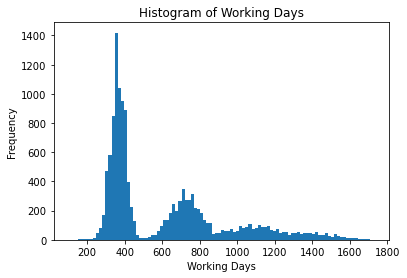

In [225]:
# Plot the histogram
plt.hist(work_days, bins=100)

# Add labels and title
plt.xlabel('Working Days')
plt.ylabel('Frequency')
plt.title('Histogram of Working Days')

# Show the plot
plt.show()

2.2 The number of quiting for each week

In [226]:
quit_week = np.array(list(map(lambda x: x.week, quit_data['quit_date'])))


In [227]:
quit_week

array([44, 14, 23, ..., 43,  2, 49])

In [228]:
data_count = {}
for value in quit_week:
    if value not in data_count:
        data_count[value] = 1
    else:
        data_count[value] += 1

data_count


{44: 293,
 14: 199,
 23: 258,
 34: 260,
 35: 276,
 43: 307,
 9: 265,
 46: 277,
 39: 265,
 28: 400,
 47: 313,
 22: 262,
 33: 261,
 31: 284,
 6: 251,
 40: 248,
 15: 363,
 20: 256,
 3: 276,
 41: 300,
 30: 252,
 10: 274,
 5: 259,
 18: 274,
 51: 193,
 13: 209,
 42: 279,
 36: 236,
 8: 231,
 2: 243,
 25: 246,
 1: 238,
 26: 278,
 7: 214,
 4: 255,
 52: 212,
 49: 292,
 45: 310,
 17: 346,
 32: 262,
 48: 289,
 24: 253,
 21: 242,
 37: 270,
 38: 275,
 12: 238,
 29: 270,
 50: 185,
 16: 153,
 19: 285,
 11: 244,
 27: 89}

In [229]:
# Get the unique values and their counts from the dictionary
values = list(data_count.keys())
counts = list(data_count.values())

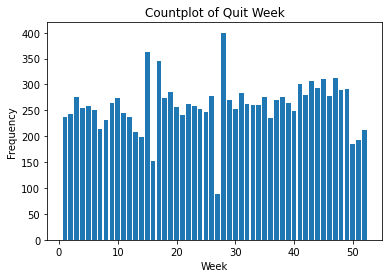

In [230]:
# Plot the countplot using Matplotlib
plt.bar(values, counts)

# Add labels and title to the plot
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Countplot of Quit Week')

# Show the plot
plt.show()

2.3 The number of quiting for each month

In [231]:
quit_month = np.array(list(map(lambda x: x.month, quit_data['quit_date'])))

In [232]:
quit_month

array([10,  4,  6, ..., 10,  1, 12])

In [233]:
# Create a dictionary to store the count of each unique value in the array
data_count = {}
for value in quit_month:
    if value not in data_count:
        data_count[value] = 1
    else:
        data_count[value] += 1

data_count


{10: 1317,
 4: 1066,
 6: 1067,
 8: 1234,
 2: 930,
 11: 1296,
 9: 1047,
 7: 1119,
 5: 1278,
 3: 1060,
 1: 1209,
 12: 887}

In [234]:
# Get the unique values and their counts from the dictionary
values = list(data_count.keys())
counts = list(data_count.values())

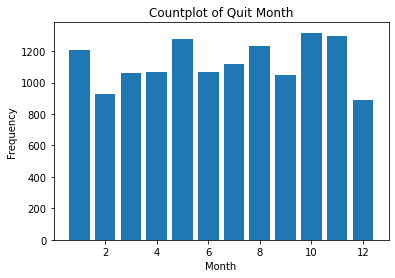

In [235]:
# Plot the countplot using Matplotlib
plt.bar(values, counts)

# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Countplot of Quit Month')

# Show the plot
plt.show()

# 3. Model Building

3.1 Feature preprocessing

In [236]:
df.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [237]:
# create a new column in a pandas DataFrame that maps the NaN (null) values to 0 and the non-null values to 1

df['quit'] = df['quit_date'].notna().astype(int)


In [238]:
df

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1
...,...,...,...,...,...,...,...,...,...
24697,24698,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,0
24698,24699,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,0
24699,24700,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,1
24700,24701,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1


In [239]:
#choose the columns we want

In [240]:
df=df.loc[:,['company_id','dept','seniority','salary','quit']]
df

,company_id,dept,seniority,salary,quit
0,7,customer_service,28,89000.0,1
1,7,marketing,20,183000.0,1
2,4,marketing,14,101000.0,0
3,7,customer_service,20,115000.0,1
4,2,data_science,23,276000.0,1
...,...,...,...,...,...
24697,3,customer_service,16,97000.0,0
24698,4,engineer,10,160000.0,0
24699,4,customer_service,11,67000.0,1
24700,10,engineer,98,266000.0,1


In [241]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [242]:
# Initialize H2O cluster
import h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 mins 35 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,2 months and 20 days
H2O_cluster_name:,H2O_from_python_yangzongkun_lm1ws3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.536 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [243]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_df = H2OFrame(df)

h2o_df['quit'] = h2o_df['quit'].asfactor()

h2o_df.summary()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/var/folders/kj/gjbr9xrs6ns8dc9jgs1f619h0000gn/T/ipykernel_53972/4280406866.py:6: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  h2o_df.summary()


,company_id,dept,seniority,salary,quit
type,int,enum,int,int,enum
mins,1.0,,1.0,17000.0,
mean,3.426969476155781,,14.127803416727366,138183.34547809843,
maxs,12.0,,99.0,408000.0,
sigma,2.7000109677072097,,8.089519596306804,76058.18457287704,
zeros,0,,0,0,
missing,0,0,0,0,0
0,7.0,customer_service,28.0,89000.0,1
1,7.0,marketing,20.0,183000.0,1
2,4.0,marketing,14.0,101000.0,0


In [244]:
# Split into 75% training and 25% test dataset
strat_split = h2o_df['quit'].stratified_split(test_frac=0.25, seed=1)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['company_id', 'dept', 'seniority', 'salary']
target = 'quit'

In [246]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)

model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1676249291128_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         5.41477e+06            20           20           20            3559          5220          4309.58

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2621560047840295
RMSE: 0.5120117232876895
LogLoss: 0.7482543588963848
Mean Per-Class Error: 0.4793378168889879
AUC: 0.5951507723031288
AUCPR: 0.5639439211481407
Gini: 0.1903015446062577

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13825023004727358
       0    1      Error    Rate
-----  ---  -----  -------  ----------------
0      707  9415   0.9302   (9415.0/10122.0)
1      289  9843   0.0285   (289.0/10132.0)
Total  996  19258  0.4791   (9704.0/20254.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.13825      0.66982   362
max f2                       0            0.83347   399
max f0point5                 0.371614     0.581648  268
max accuracy                 0.540558     0.573664  188
max precision                0.933968     0.591623  11
max recall                   0            1         399
max specificity              0.998554     0.999605  0
max absolute_mcc             0.324054     0.14779   289
max min_per_class_accuracy   0.537125     0.571923  190
max mean_per_class_accuracy  0.540558     0.573666  188
max tns                      0.998554     10118     0
max fns                      0.998554     10129     0
max fps                      0            10122     399
max tps                      0            10132     399
max tnr                      0.998554     0.999605  0
max fnr                      0.998554     0.999704  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 52.29 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100227                   0.929896           1.14229   1.14229            0.571429         0.95161   0.571429                    0.95161             0.0114489       0.0114489                  14.2293   14.2293            0.00285374
2        0.0200454                   0.904752           1.09306   1.11767            0.546798         0.916379  0.559113                    0.933994            0.0109554       0.0224043                  9.30564   11.7675            0.00472001
3        0.0300188                   0.885799           1.14795   1.12773            0.574257         0.895501  0.564145                    0.921205            0.0114489       0.0338531                  14.7948   12.7733            0.00767254
4        0.0400415                   0.871678           1.26046   1.16096            0.630542         0.878761  0.580764                    0.910581            0.0126332       0.0464864                  26.0461   16.0956            0.0128962
5        0.0500148                   0.858345           1.02919   1.13468            0.514851         0.865169  0.567621                    0.9

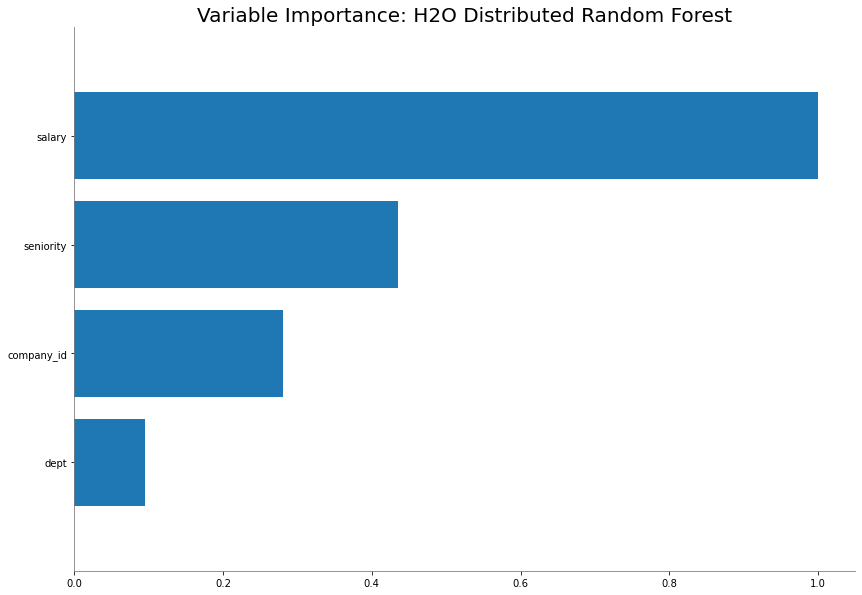

<Figure size 432x288 with 0 Axes>

In [247]:
model.varimp_plot()

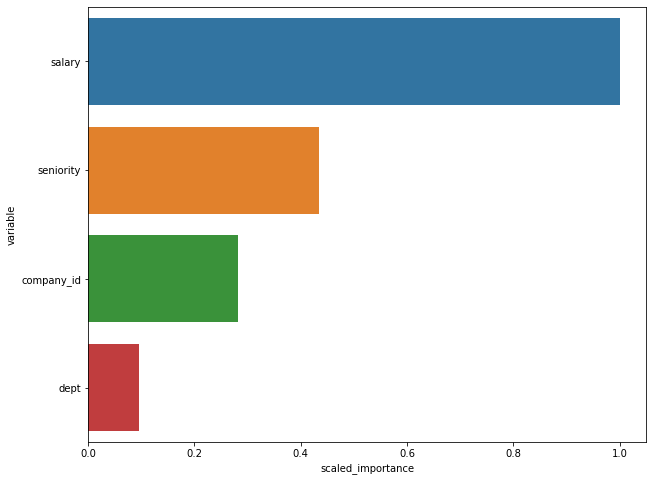

In [248]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()

In [250]:
from sklearn.metrics import auc, roc_curve, classification_report

In [251]:
# Make predictions

train_true = train.as_data_frame()['quit'].values
test_true = test.as_data_frame()['quit'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)

train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [252]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43      2798
           1       0.56      0.64      0.60      3378

    accuracy                           0.53      6176
   macro avg       0.52      0.52      0.52      6176
weighted avg       0.52      0.53      0.52      6176

